# Hito 1
**Nombres:** Gonzalo Sobarzo, Hernán Ulloa, Alexander Reisenegger, Ignacio Huenchumil.

**Fecha:** Septiembre 2022

**Grupo:** 11

**Curso:** CC5205

**Cuerpo docente:** Andres Abeliuk, Hernán Sarmiento,  Cinthia Sánchez, Jorge Ortiz

# Introducción
Como equipo buscamos una base de datos de música para así llevar a cabo un estudio de datos para poder predecir (y corroborar) distintos comportamientos de los consumidores de música, como por ejemplo, buscar potenciales hits sabiendo la trayectoria del artista o tal vez un posible remix al ver la popularidad de la canción original de modo que se estudiaran distintas influencia de los atributos de las canciones en su éxito.

Nuestra base de datos consta de distintos premios y certificaciones para canciones, albumes, artistas y a su vez cuanto tiempo se mantuvo popular, de modo que solo se muestran canciones que sean éxitos del momento tanto en spotify como en la lista de billboard, esto sera útil para poder predecir distintos atributos de una canción o artista y así enfocar nuestro proyecto al análisis de tendecias musicales.



# Exploración de datos
El dataset consiste de 8 tablas, una que contiene datos de las canciones que aparecen en la lista billboard 100 cada semana desde 1999 hasta 2019, incluyendo datos como el título, los artistas, los géneros de la cancion, artistas invitados y cuántas semanas ha pasado en el top hasta la fecha, y tabién una tabla que contiene datos de cada artista que ha aparecido en esa lista en dicho período de tiempo. También incluye 2 listas de los premios Grammy en el mismo intervalo de tiempo, una sobre canciones y una sobre los álbumes. Además una tabla de singles y una de álbumes según su certificación RIAA, también en el mismo período (certifica cuántas copias vendieron, por ejemplo certificación diamante, platino, multi platino, oro, diamante varias veces, entre otros). Por último hay 2 tablas de las canciones más populares de spotify desde 2016 hasta 2019, también semanales. Una tiene los datos generales del top 200 semanal como la cantidad de reproducciones y el nombre entre otros, y la otra tiene atributos para cada canción como por ejemplo energía, si está en modo mayor o menor, bailabilidad, etc.

Hay múltiples dudas que se puede plantear al respecto, por ejemplo la canción Radioactive de Imagine Dragons pasó casi 2 años en el Billboard 100, y sería interesante analizar por qué una canción mantiene su popularidad, mientras otras sólo se quedan en la fama por un corto período.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
artistDf = pd.read_csv('data/artistDf.csv')
spotifyWeeklyTop = pd.read_csv('data/spotifyWeeklyTop200Streams.csv')
songAttributes = pd.read_csv('data/songAttributes_1999-2019.csv')
riaaSingleCerts = pd.read_csv('data/riaaSingleCerts_1999-2019.csv')
riaaAlbumCerts = pd.read_csv('data/riaaAlbumCerts_1999-2019.csv')
grammySongs = pd.read_csv('data/grammySongs_1999-2019.csv', sep = ';')
grammyAlbums = pd.read_csv('data/grammyAlbums_199-2019.csv')
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')


In [3]:
spotifyWeeklyTop.head()

,Unnamed: 0,Name,Artist,Features,Streams,Week
0,0,In My Feelings,Drake,NaN,30747676,2018-07-20
1,1,Lucid Dreams,Juice WRLD,NaN,12930705,2018-07-20
2,2,Nonstop,Drake,NaN,12312859,2018-07-20
3,3,God is a woman,Ariana Grande,NaN,10771324,2018-07-20
4,4,SAD!,XXXTENTACION,NaN,10503061,2018-07-20


In [4]:
billboardHot100.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [49]:
billboardHot100.shape


(97225, 12)

In [74]:
songs = billboardHot100.drop_duplicates(subset = ['Artists', 'Name'])


In [75]:
dicc = {}
for row, col in songs.iterrows():
    aux = col['Genre'].split(',')
    for k in aux:
        if k in aux:
            dicc[k] = dicc.get(k,0) + 1



In [76]:

gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frecuency'])

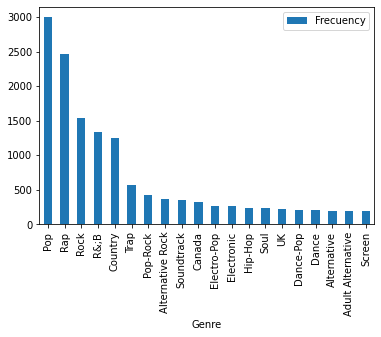

In [77]:
gen2 = gen.sort_values(by = ['Frecuency'], ascending=False).head(20)
ax = gen2.plot.bar(x='Genre', y = 'Frecuency', stacked=True)

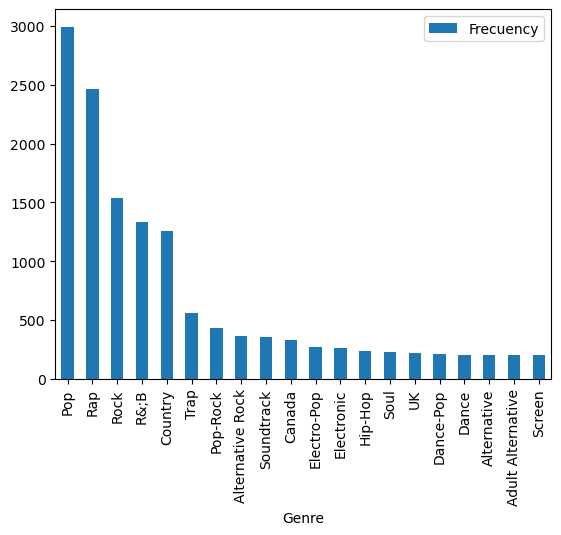

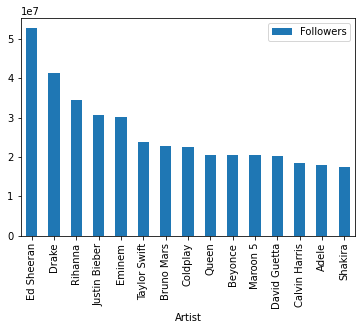

In [10]:
artist_p = artistDf.sort_values(by = ['Followers'], ascending=False)
artist_p = artist_p.head(17)
artist_p = artist_p.drop([769, 828]) #elimina play y cold, ya que eran versiones repetidas de coldplay
ax = artist_p.plot.bar(x= 'Artist', y = 'Followers', stacked= True)

<AxesSubplot:title={'center':'Distribucion de los atributos de las canciones más populares'}>

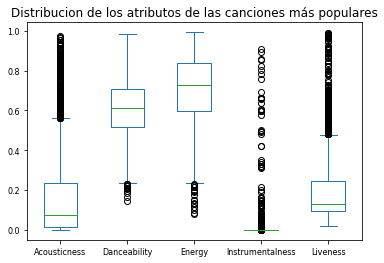

In [70]:

songAttributes = songAttributes.rename(columns = {"Artist" : "Artists"})
songAttributes.head()
sa = (
    songAttributes.merge(billboardHot100, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
sa = sa.drop_duplicates(subset = ["Name", "Artists"])

sa.iloc[:,[1, 4, 6, 8, 9]].plot.box(stacked=True, fontsize = 8, title = "Distribucion de los atributos de las canciones más populares")



<AxesSubplot:>

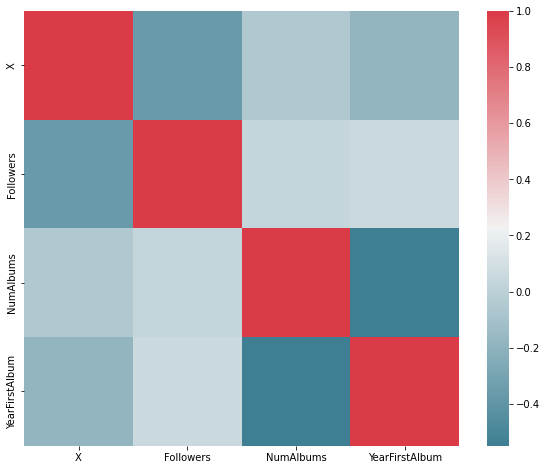

In [12]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
f, ax = pl.subplots(figsize=(10, 8))
corr = artistDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

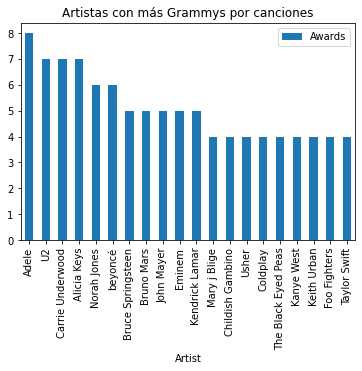

In [32]:
winners = grammySongs.loc[:, ['Artist']]
gen3 = winners.groupby(winners.columns.tolist(),as_index=False).size().rename(columns={'size':'Awards'})
gen4 = gen3.sort_values(by = ['Awards'], ascending=False).head(20)
grs = gen4.plot.bar(x= 'Artist', y = 'Awards', stacked= True, title = 'Artistas con más Grammys por canciones')


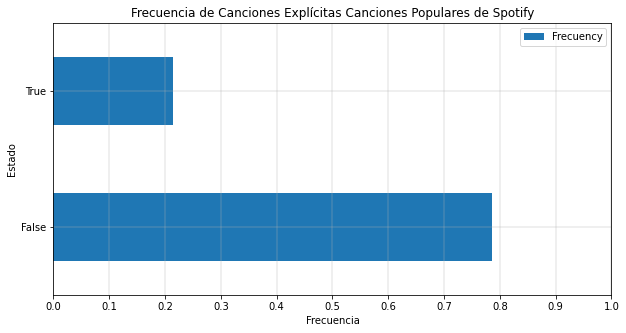

In [72]:
explicit = songAttributes.Explicit.value_counts(normalize=True)
df2 = pd.DataFrame([
                    ["False",explicit[0]],
                    ["True",explicit[1]]
                    ],
                    columns=["State","Frecuency"])


ax  = df2.plot.barh(x = "State", y = "Frecuency", xticks = [k/10 for k in list(range(11))], figsize = (10,5))
ax.set(xlabel = "Frecuencia", ylabel = "Estado", title = "Frecuencia de Canciones Explícitas Canciones Populares de Spotify")
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

# Preguntas y problemas

Preguntas y problemas
 Despues de haber analizando y planteado las tablas con sus respectivos datos sabemos que todas las tablas poseen una medida de popularidad, alcance o ventas, que miden la influencia de la canción artista y/o album, al mismo tiempo se puede ver que estos rankings son distintos ya que spotify tiene una base de datos distinta a las demas tablas (RIAA, Billboars, Grammys) Por lo cual podemos manejarnos entre las tablas midiendo la popularidad con las siguientes preguntas:
- ¿Que hace que ciertos géneros musicales se mantengan mas tiempo con popularidad?
- ¿Que hace que ciertas canciones suenan mas, mucho tiempo despues de haber salido? (se puede ver con los rmx).
- ¿Que hace que ciertos generos se benefician de ser explicit? (metal, rap y trap a mi parecer pero creo poder pillar mas).